Comparing different gradient descent to find the best type to optimize the machine learning model by minimizing the cost function. the different types of gradient descent used are Ordinary least square,Batch gradient descent,Stochastic gradient descent,Mini batch gradient descent.



> Linear regression without using scikit learn




In [ ]:
import numpy as np

class LinearRegression:
  def __init__(self,learning_rate=0.01,num_iterations=1000):
    self.learning_rate=learning_rate
    self.num_iterations=num_iterations
    self.weights=None
    self.bias=None

  def fit(self,x,y):
    num_samples,num_features=x.shape
    self.weights=np.zeros(num_features)
    self.bias=0

    for i in range(self.num_iterations):
      linear_model=np.dot(x,self.weights)+self.bias
      dw=(1/num_samples)*np.dot(x.T,(linear_model-y))
      db=(1/num_samples)*np.sum(linear_model-y)

      self.weights-=self.learning_rate*dw
      self.bias-=self.learning_rate*db

  def predict(self,x):
    return np.dot(x,self.weights)+self.bias

x=np.array([[1,2,3,4,5]]).T
y=np.array([2,4,6,8,10])


model=LinearRegression()
LinearRegression(learning_rate=0.01,num_iterations=1000)
model.fit(x,y)
x_test=np.array([[6],[7],[8]])
predictions=model.predict(x_test)
print('predictions:',predictions)

predictions: [11.93728249 13.91103737 15.88479225]


Performing linear regression for height and weight dataset. the task is to predict weight of the person from their height.

In [ ]:
import statsmodels.api as sm
import pandas as pd
d=pd.read_csv('/content/data.csv')

Height = d['Height'].tolist()
Weight = d['Weight'].tolist()

x=sm.add_constant(Height)
result=sm.OLS(Weight,Height).fit()
print(result.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              7476.
Date:                Tue, 07 Nov 2023   Prob (F-statistic):                    1.67e-20
Time:                        09:52:12   Log-Likelihood:                         -36.182
No. Observations:                  15   AIC:                                      74.36
Df Residuals:                      14   BIC:                                      75.07
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Ordinary least square

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
d=pd.read_csv('/content/data.csv')

X=d['Height'].values.reshape(-1,1)
y=d['Weight']

regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.49937056025884025


Batch gradient descent

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd
d=pd.read_csv('/content/data.csv')


X = d['Height'].values.reshape(-1,1)
y = d['Weight'].values.flatten()

learning_rate = 0.01
num_iterations = 1000

theta0 = 0
theta1 = 0

for iteration in range(num_iterations):
    y_pred=theta0 + theta1 * X
    error = y_pred-y
    gradient_theta0 = np.sum(error) / len(y)
    gradient_theta1 = np.sum(error * X) / len(y)
    theta0 -= learning_rate * gradient_theta0
    theta1 -= learning_rate * gradient_theta1


y_pred = theta0 + theta1 * X
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 24.555114058676313


Stochastic gradient descent

In [ ]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
d = pd.read_csv('/content/data.csv')

X = d['Height'].values.reshape(-1, 1)
y = d['Weight'].values

regressor = SGDRegressor(loss='squared_error', alpha=0.0001, learning_rate='constant', eta0=0.01, max_iter=1000)
regressor.fit(X,y)
y_pred = regressor.predict(X)

mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 14.17033577684104


Mini batch gradient descent


In [ ]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
d = pd.read_csv('/content/data.csv')

X = d['Height'].values.reshape(-1, 1)
y = d['Weight'].values

regressor = SGDRegressor(
    loss='squared_error',
    alpha=0.0001,
    learning_rate='constant',
    eta0=0.01,
    max_iter=1000,
    random_state=42,
    shuffle=True,
    n_iter_no_change=10
)


regressor.fit(X, y)
y_pred = regressor.predict(X)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 13.994004729906326


The Mean Squared Error (MSE) of Ordinary Least Squares is less than the other descent methods like batch gradient descent, minibatch gradient descent, & stochastic gradient descent (SGD). This is because OLS finds the optimal solution to the linear regression problem in a closed-form manner and provides the best possible fit to the data under the assumptions of the linear regression model.
OLS computes the regression coefficients analytically, finding the values that minimize the sum of squared residuals directly


For the optimization algorithm (batch gradient descent) modify the learning rate and plot the convergence plot for different learning rates to find the optimal learning rate


learning rate - 0.01

Final Mean Squared Error: 24.555114058676313


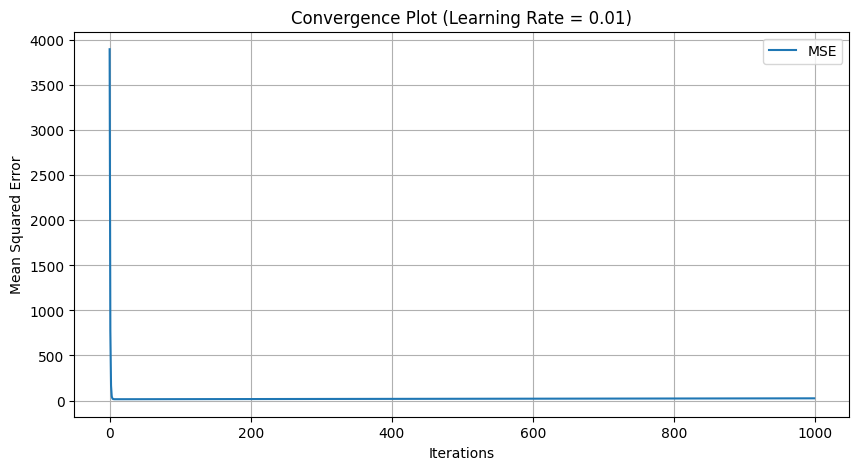

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
d = pd.read_csv('/content/data.csv')

X = d['Height'].values.reshape(-1, 1)
y = d['Weight'].values.flatten()

learning_rate = 0.01
num_iterations = 1000

theta0 = 0
theta1 = 0
mse_history = []

for iteration in range(num_iterations):
    y_pred = theta0 + theta1 * X
    error = y_pred - y
    gradient_theta0 = np.sum(error) / len(y)
    gradient_theta1 = np.sum(error * X) / len(y)
    theta0 -= learning_rate * gradient_theta0
    theta1 -= learning_rate * gradient_theta1

    mse = mean_squared_error(y, y_pred)
    mse_history.append(mse)

y_pred = theta0 + theta1 * X
mse = mean_squared_error(y, y_pred)
print("Final Mean Squared Error:", mse)

plt.figure(figsize=(10, 5))
plt.plot(range(num_iterations), mse_history, label='MSE')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Convergence Plot (Learning Rate = {})'.format(learning_rate))
plt.legend()
plt.grid()
plt.show()



learning rate - 0.001

Final Mean Squared Error: 15.537274261108367


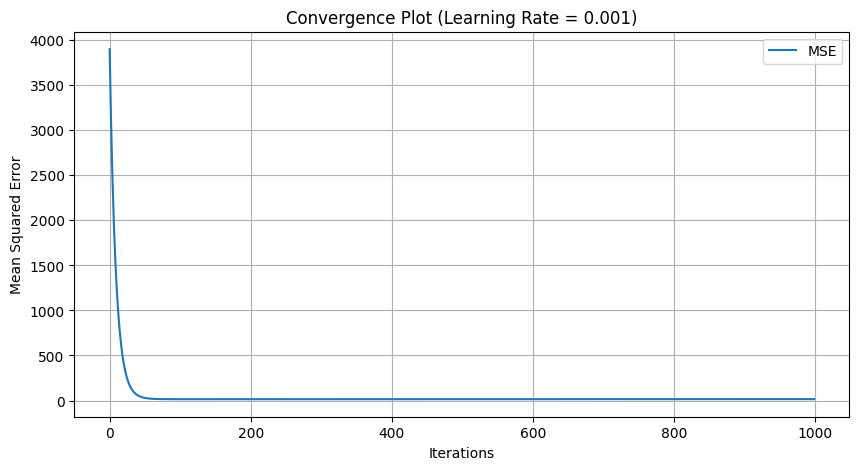

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

d = pd.read_csv('/content/data.csv')

X = d['Height'].values.reshape(-1, 1)
y = d['Weight'].values.flatten()

learning_rate = 0.001
num_iterations = 1000

theta0 = 0
theta1 = 0

mse_history = []

for iteration in range(num_iterations):
    y_pred = theta0 + theta1 * X
    error = y_pred - y
    gradient_theta0 = np.sum(error) / len(y)
    gradient_theta1 = np.sum(error * X) / len(y)
    theta0 -= learning_rate * gradient_theta0
    theta1 -= learning_rate * gradient_theta1
    mse = mean_squared_error(y, y_pred)
    mse_history.append(mse)

y_pred = theta0 + theta1 * X
mse = mean_squared_error(y, y_pred)
print("Final Mean Squared Error:", mse)

plt.figure(figsize=(10, 5))
plt.plot(range(num_iterations), mse_history, label='MSE')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Convergence Plot (Learning Rate = {})'.format(learning_rate))
plt.legend()
plt.grid()
plt.show()

learning rate - 0.0001

Final Mean Squared Error: 14.748704181661276


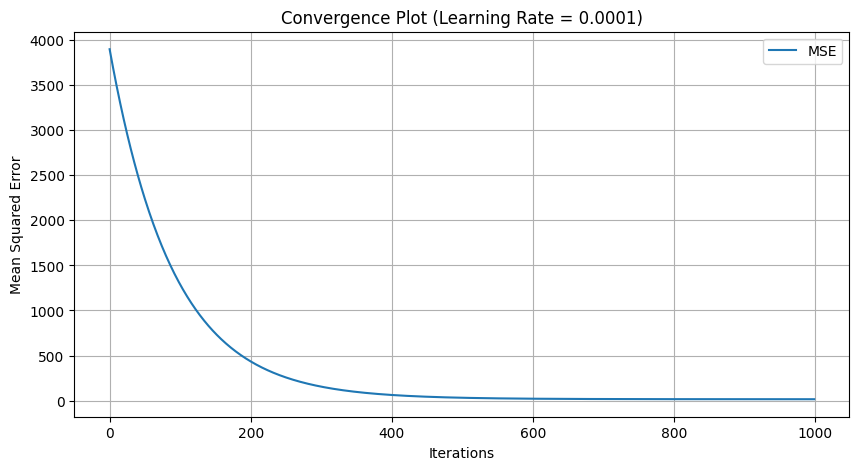

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
d = pd.read_csv('/content/data.csv')

X = d['Height'].values.reshape(-1, 1)
y = d['Weight'].values.flatten()

learning_rate = 0.0001
num_iterations = 1000

theta0 = 0
theta1 = 0

mse_history = []
for iteration in range(num_iterations):
    y_pred = theta0 + theta1 * X
    error = y_pred - y
    gradient_theta0 = np.sum(error) / len(y)
    gradient_theta1 = np.sum(error * X) / len(y)
    theta0 -= learning_rate * gradient_theta0
    theta1 -= learning_rate * gradient_theta1
    mse = mean_squared_error(y, y_pred)
    mse_history.append(mse)

y_pred = theta0 + theta1 * X
mse = mean_squared_error(y, y_pred)
print("Final Mean Squared Error:", mse)

plt.figure(figsize=(10, 5))
plt.plot(range(num_iterations), mse_history, label='MSE')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Convergence Plot (Learning Rate = {})'.format(learning_rate))
plt.legend()
plt.grid()
plt.show()


Final Mean Squared Error: 6.098669158976525e+30


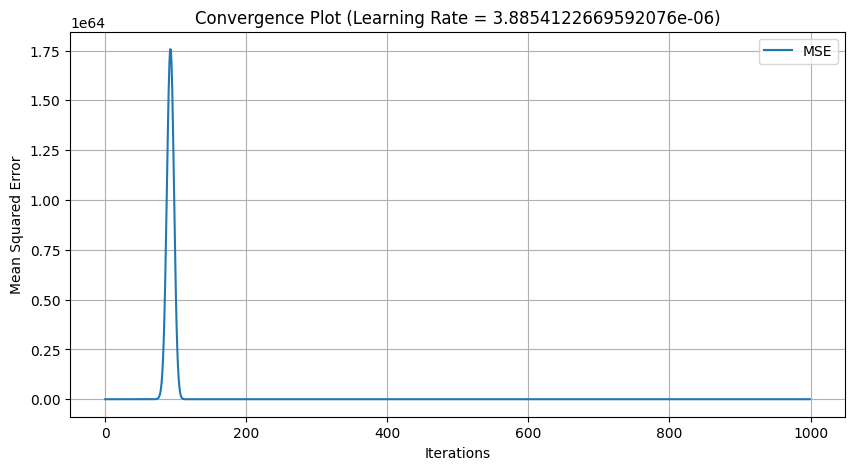

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

d = pd.read_csv('/content/data.csv')

X = d['Height'].values.reshape(-1, 1)
y = d['Weight'].values.flatten()

learning_rate = 0.09
num_iterations = 1000

theta0 = 0
theta1 = 0

mse_history = []  # To store MSE values at each iteration

for iteration in range(num_iterations):
    y_pred = theta0 + theta1 * X
    error = y_pred - y
    gradient_theta0 = np.sum(error) / len(y)
    gradient_theta1 = np.sum(error * X) / len(y)
    theta0 -= learning_rate * gradient_theta0
    theta1 -= learning_rate * gradient_theta1

    # Learning rate scheduling: Reduce learning rate gradually
    learning_rate *= 0.99  # You can adjust the reduction factor

    # Calculate MSE and store it for plotting
    mse = mean_squared_error(y, y_pred)
    mse_history.append(mse)

# Make predictions using the final coefficients
y_pred = theta0 + theta1 * X

# Calculate the Mean Squared Error for the final predictions
mse = mean_squared_error(y, y_pred)
print("Final Mean Squared Error:", mse)

# Create a convergence plot
plt.figure(figsize=(10, 5))
plt.plot(range(num_iterations), mse_history, label='MSE')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Convergence Plot (Learning Rate = {})'.format(learning_rate))
plt.legend()
plt.grid()
plt.show()


Final Mean Squared Error: 4.42036962254679e+39


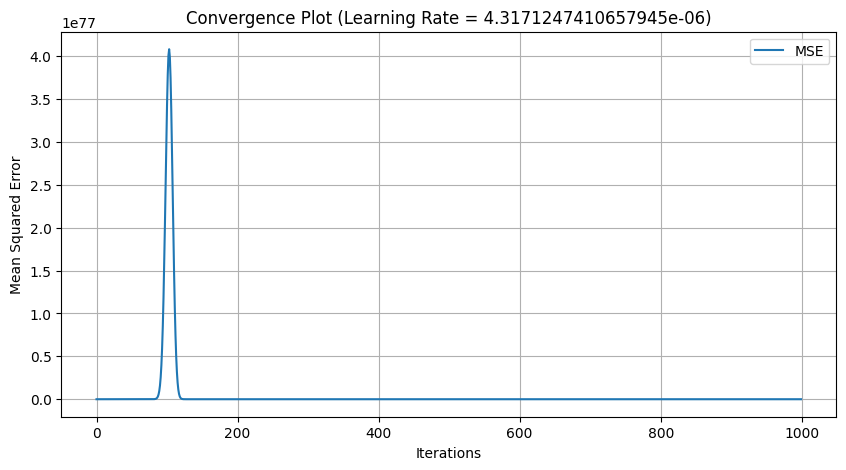

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

d = pd.read_csv('/content/data.csv')

X = d['Height'].values.reshape(-1, 1)
y = d['Weight'].values.flatten()

learning_rate = 0.1
num_iterations = 1000

theta0 = 0
theta1 = 0

mse_history = []  # To store MSE values at each iteration

for iteration in range(num_iterations):
    y_pred = theta0 + theta1 * X
    error = y_pred - y
    gradient_theta0 = np.sum(error) / len(y)
    gradient_theta1 = np.sum(error * X) / len(y)
    theta0 -= learning_rate * gradient_theta0
    theta1 -= learning_rate * gradient_theta1

    # Learning rate scheduling: Reduce learning rate gradually
    learning_rate *= 0.99  # You can adjust the reduction factor

    # Calculate MSE and store it for plotting
    mse = mean_squared_error(y, y_pred)
    mse_history.append(mse)

# Make predictions using the final coefficients
y_pred = theta0 + theta1 * X

# Calculate the Mean Squared Error for the final predictions
mse = mean_squared_error(y, y_pred)
print("Final Mean Squared Error:", mse)

# Create a convergence plot
plt.figure(figsize=(10, 5))
plt.plot(range(num_iterations), mse_history, label='MSE')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Convergence Plot (Learning Rate = {})'.format(learning_rate))
plt.legend()
plt.grid()
plt.show()


Inference :  different learning rating,the rapid convergence takes place with the minimum learning rate i,e 0.0001. This indicates that the algorithm is making significant progress in minimizing the objective function. This is a sign of effective learning.
slow convergence takes place with the high learning rate,this indicates that the requiring more iterations to reach convergence.
The convergence plot shows how quickly the algorithm converges towards the minimum of the objective function.so here,the learning rate with 0.0001 is the best learning rate where the curve descends quickly.
